In [21]:
%matplotlib notebook
from fits_mask_tools import FitsViewer, BackgroundInteractive, MaskPainter, BinnedFitsViewer
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [22]:
FLUXMAG0 = 63095734448.0194 # counts to magnitudes
IMAGE_PSF = 5.0
IMAGE_SCALE = 0.2 # arcsec
library_path = './library'

<IPython.core.display.Javascript object>


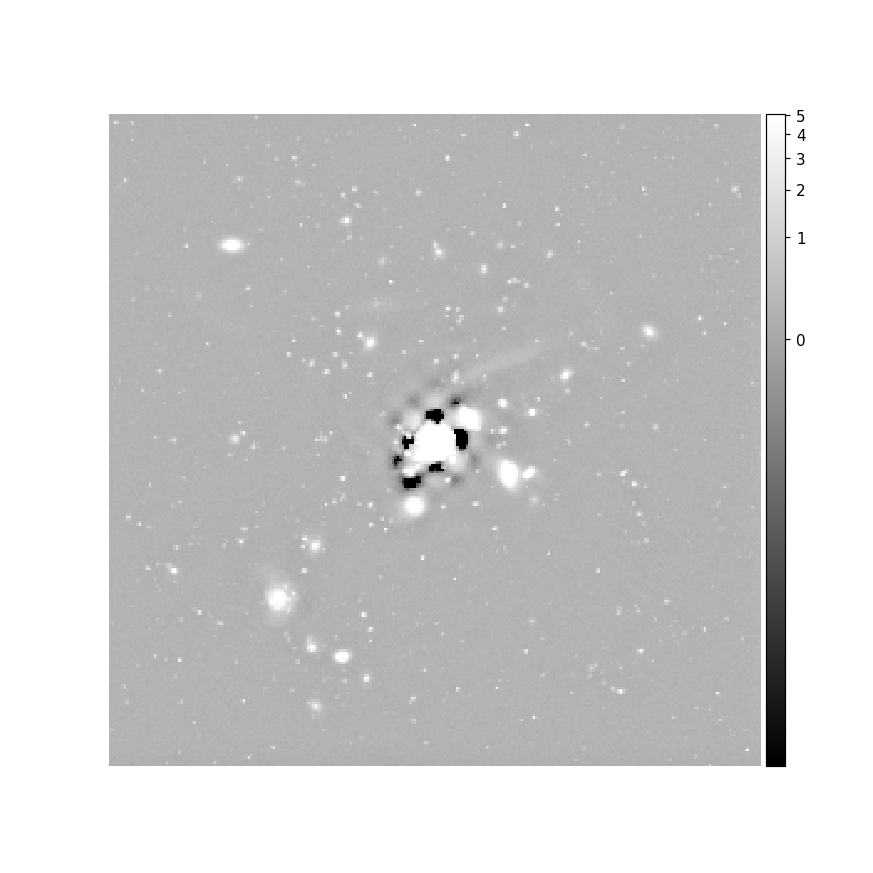

interactive(children=(Dropdown(description='stretch', index=1, options=('linear', 'log', 'sqrt', 'asinh'), val…

IntSlider(value=1, description='Binning', max=20, min=1)

In [24]:
rebinned_fv = BinnedFitsViewer.load_state()

<IPython.core.display.Javascript object>


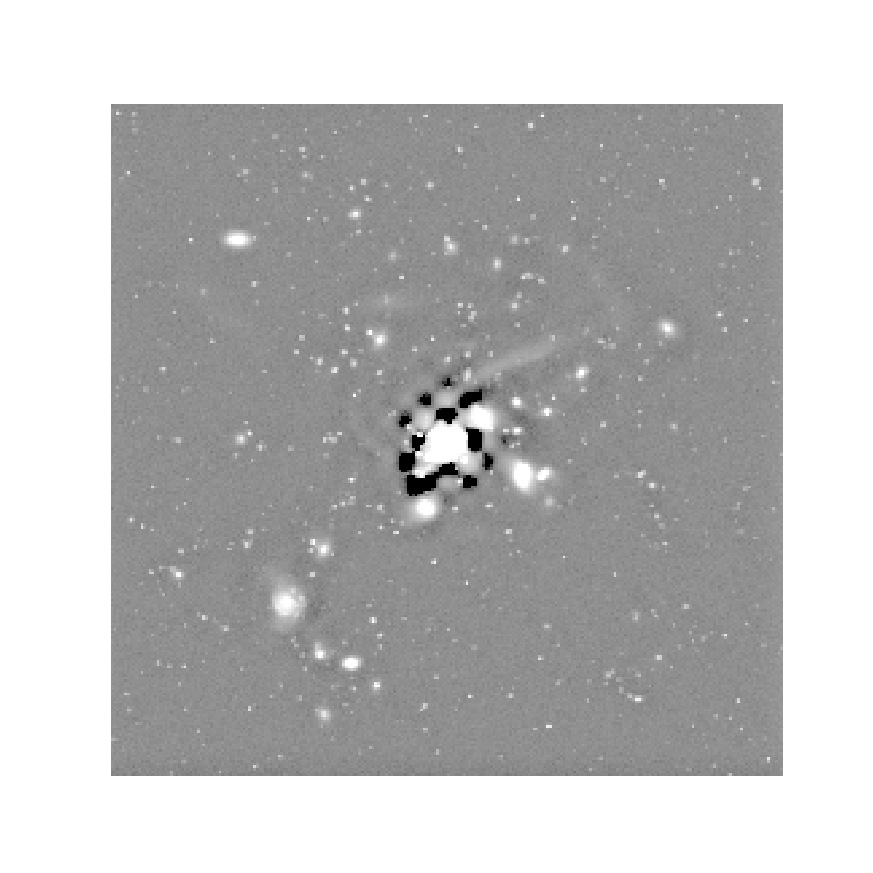

MaskPainter ready — click to create a zoom crop, paint, then commit.


In [9]:
painter = MaskPainter(rebinned_fv)

<IPython.core.display.Javascript object>


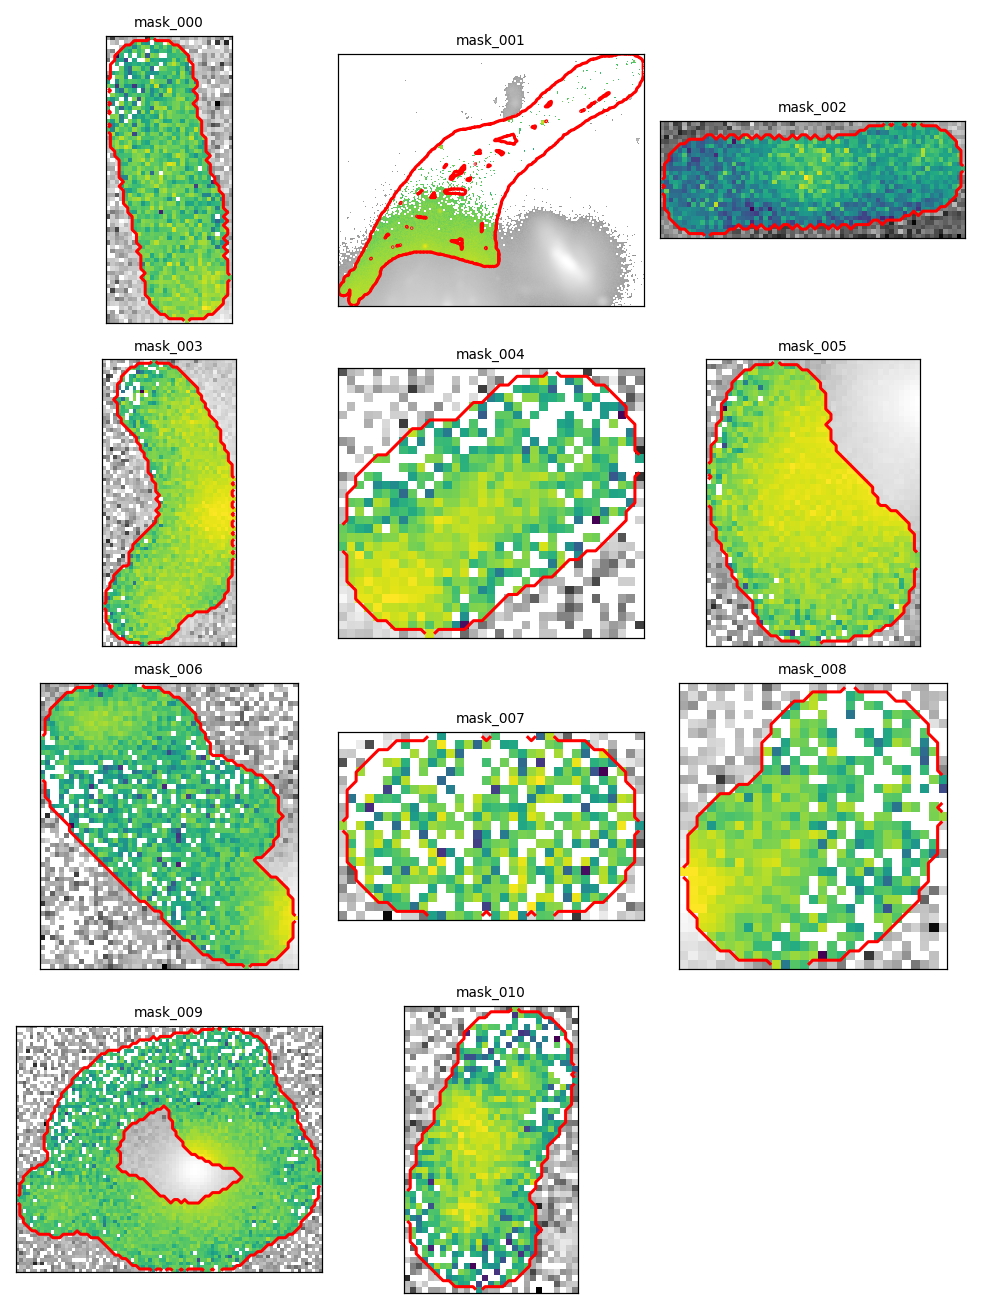

/home/ppzgm/Dropbox/Code/python_fits_viewer/fits_mask_tools.py:779: RuntimeWarning: invalid value encountered in log10
  img_plot = np.log10(img) if use_log else img


In [10]:
dict_masks = MaskPainter.plot_saved_masks('./masks/masks_data.hdf5', FLUXMAG0, IMAGE_SCALE)

In [13]:
print("Mask summary:")
print("-" * 40)
for mask_name, info in dict_masks.items():

    img_masked = info['masked_data']
    
    total_counts = np.ma.sum(img_masked)
    area_pixels = np.count_nonzero(img_masked.mask)
    
    print(f"{mask_name}:")
    print(f"  Area (pixels): {area_pixels}")
    print(f"  Total counts: {total_counts:.3e}")
    print("-" * 40)
    
    
    IMAGE_SCALE**2
    FLUXMAG0

Mask summary:
----------------------------------------
mask_000:
  Area (pixels): 647
  Total counts: 1.927e+03
----------------------------------------
mask_001:
  Area (pixels): 210059
  Total counts: 1.076e+05
----------------------------------------
mask_002:
  Area (pixels): 464
  Total counts: 6.573e+03
----------------------------------------
mask_003:
  Area (pixels): 965
  Total counts: 4.100e+03
----------------------------------------
mask_004:
  Area (pixels): 383
  Total counts: 8.989e+02
----------------------------------------
mask_005:
  Area (pixels): 784
  Total counts: 3.911e+03
----------------------------------------
mask_006:
  Area (pixels): 1210
  Total counts: 2.696e+03
----------------------------------------
mask_007:
  Area (pixels): 128
  Total counts: 2.348e+02
----------------------------------------
mask_008:
  Area (pixels): 276
  Total counts: 5.444e+02
----------------------------------------
mask_009:
  Area (pixels): 2271
  Total counts: 6.096e+03
-

In [15]:
-2.5 * np.log10(total_counts/FLUXMAG0) + 2.5 * np.log10(area_pixels / IMAGE_SCALE**2)

29.502417383493484

In [17]:
# Constants (example values, replace with your own)
FLUXMAG0 = 3631.0      # Zero-point in Jy
IMAGE_SCALE = 0.2      # arcsec/pixel

# Assume masked_info is the dictionary returned by plot_saved_masks
# Loop over each saved mask
for mask_name, info in dict_masks.items():
    masked_data = info['masked_data']          # masked array of the cutout
    mask = ~masked_data.mask                    # boolean array: True where the mask is applied
    
    # 1. Compute total flux in the masked region
    total_flux = np.sum(masked_data.data[mask])   # sum of pixel fluxes in masked region
    
    # 2. Compute the area in pixels
    area_pix = np.count_nonzero(mask)
    
    # 3. Convert pixel area to arcsec^2
    area_arcsec2 = area_pix * IMAGE_SCALE**2
    
    print(total_flux)
    
    # 4. Compute surface brightness (mag/arcsec^2)
    # Surface brightness formula: mu = -2.5 * log10(flux / area) + ZP
    # Here we assume FLUXMAG0 is the zero-point corresponding to 0 mag
    surface_brightness = -2.5 * np.log10(total_flux/FLUXMAG0) + 2.5*np.log10(area_arcsec2)
    
    # Output
    print(f"{mask_name}:")
    print(f"  Total flux (pixels sum): {total_flux:.3e}")
    print(f"  Area (pixels): {area_pix}")
    print(f"  Area (arcsec^2): {area_arcsec2:.3f}")
    print(f"  Surface brightness (mag/arcsec^2): {surface_brightness:.2f}")
    print("-"*40)

1927.2347250691755
mask_000:
  Total flux (pixels sum): 1.927e+03
  Area (pixels): 1267
  Area (arcsec^2): 50.680
  Surface brightness (mag/arcsec^2): 4.95
----------------------------------------
107620.412237023
mask_001:
  Total flux (pixels sum): 1.076e+05
  Area (pixels): 83173
  Area (arcsec^2): 3326.920
  Surface brightness (mag/arcsec^2): 5.13
----------------------------------------
6573.124790891321
mask_002:
  Total flux (pixels sum): 6.573e+03
  Area (pixels): 1304
  Area (arcsec^2): 52.160
  Surface brightness (mag/arcsec^2): 3.65
----------------------------------------
4100.041610356414
mask_003:
  Total flux (pixels sum): 4.100e+03
  Area (pixels): 1660
  Area (arcsec^2): 66.400
  Surface brightness (mag/arcsec^2): 4.42
----------------------------------------
898.9329070199528
mask_004:
  Total flux (pixels sum): 8.989e+02
  Area (pixels): 702
  Area (arcsec^2): 28.080
  Surface brightness (mag/arcsec^2): 5.14
----------------------------------------
3910.6378444646098